In [1]:
from sklearn.manifold import MDS
import numpy as np
from dgl.data import citation_graph as citegrh
from scipy.spatial import distance
from Notebooks.performance import rand_score
from sklearn.cluster import KMeans

In [2]:
data = citegrh.load_cora()
features = data.features.astype(bool)
labels = data.labels

In [3]:
dissims = {(i,j): distance.jaccard(f1,f2) for i,f1 in enumerate(features) for j,f2 in enumerate(features) if j>=i}

In [4]:
diss_matrix=np.array([[dissims[(i,j)] if (i,j) in dissims else dissims[(j,i)] for j in range(features.shape[0])] for i in range(features.shape[0])])

In [5]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
check_symmetric(diss_matrix)

True

In [7]:
labels_1hot = np.eye(np.max(labels) + 1)[labels]
same_comm = np.dot(labels_1hot,np.transpose(labels_1hot))

In [13]:
print(np.mean(diss_matrix*same_comm))
print(np.mean(diss_matrix*(1-same_comm)))

0.17237018096697254
0.7986588916200146


In [35]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(affinity="precomputed",n_clusters=7,linkage="complete").fit(diss_matrix)
rand_score(labels,clustering.labels_)

0.0001293825898501284

In [36]:
unique, counts = np.unique(clustering.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 2492, 1: 43, 2: 112, 3: 7, 4: 9, 5: 14, 6: 31}

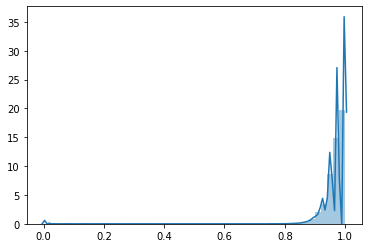

In [33]:
import seaborn as sns
sns.distplot(diss_matrix.flatten())

In [22]:
clust_labels_1hot = np.eye(np.max(clustering.labels_) + 1)[clustering.labels_]
clust_same_comm = np.dot(clust_labels_1hot,np.transpose(clust_labels_1hot))

In [23]:
print(np.mean(diss_matrix*clust_same_comm))
print(np.mean(diss_matrix*(1-clust_same_comm)))

0.9654445718938891
0.0055845006930978


In [20]:
diss_matrix

array([[0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.97368421],
       [1.        , 0.        , 0.91666667, ..., 0.93939394, 0.94117647,
        1.        ],
       [1.        , 0.91666667, 0.        , ..., 0.94736842, 1.        ,
        0.975     ],
       ...,
       [1.        , 0.93939394, 0.94736842, ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.94117647, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.97368421, 1.        , 0.975     , ..., 1.        , 1.        ,
        0.        ]])

### MDS

In [98]:
embedding = MDS(n_components=3,dissimilarity="precomputed",n_jobs=2,n_init=4)
features_transformed = embedding.fit_transform(diss_matrix)

In [99]:
features_transformed

array([[ 0.59940726,  0.20047227, -0.16282004],
       [-0.32581278, -0.31869858, -0.40054457],
       [ 0.12807879,  0.47964103,  0.30034475],
       ...,
       [-0.38129584, -0.25161584, -0.5158781 ],
       [ 0.63651412, -0.18157687, -0.21616142],
       [-0.61117969, -0.24698675, -0.18230764]])

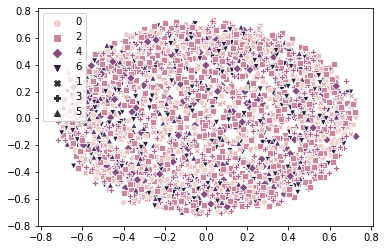

In [100]:
import seaborn as sns
sns.scatterplot(x=features_transformed[:,0],y=features_transformed[:,1],style=labels,hue=labels)

In [101]:
kmeans = KMeans(n_clusters=7,n_init=10,max_iter=1000).fit(features_transformed)
rand_score(labels,kmeans.labels_)

0.005684599161401729